In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization


In [5]:
# Path to your data directory
data_dir = '/Users/advait/Desktop/Knee_Arthiritis_AI/data'

# Get class names
class_names = ["0Normal", "1Doubtful", "2Mild", "3Moderate", "4Severe"]

# Initialize lists to hold file paths and labels
file_paths = []
labels = []

# Load file paths and labels
for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.endswith(".png"): 
            file_paths.append(os.path.join(class_dir, file_name))
            labels.append(idx)

# Convert to numpy arrays
file_paths = np.array(file_paths)
labels = np.array(labels)

# Perform stratified split
train_paths, val_paths, train_labels, val_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

# Function to load and preprocess images
def load_and_preprocess_image(path):
    img = load_img(path, target_size=(300, 160))
    img = img_to_array(img)
    img = img / 255.0
    return img

# Data generator function
def data_generator(file_paths, labels, batch_size):
    while True:
        indices = np.arange(len(file_paths))
        np.random.shuffle(indices)
        for start in range(0, len(file_paths), batch_size):
            end = min(start + batch_size, len(file_paths))
            batch_indices = indices[start:end]
            batch_images = np.array([load_and_preprocess_image(file_paths[i]) for i in batch_indices])
            batch_labels = to_categorical(labels[batch_indices], num_classes=len(class_names))
            yield batch_images, batch_labels

# Parameters
batch_size = 32

# Create generators for training and validation
train_generator = data_generator(train_paths, train_labels, batch_size)
validation_generator = data_generator(val_paths, val_labels, batch_size)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Build the CNN model with padding and dropout layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(300, 160, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Additional Conv layer
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Another Additional Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),  # Additional Conv layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),  # Another Additional Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Additional Conv layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Another Additional Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Additional Conv layer
    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Another Additional Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),  # Additional Conv layer
    Conv2D(512, (3, 3), activation='relu', padding='same'),  # Another Additional Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_crossentropy', 'accuracy'])

# Calculate steps per epoch and validation steps
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 495s 12s/step - accuracy: 0.2580 - categorical_crossentropy: 2.3887 - loss: 2.3887 - val_accuracy: 0.3000 - val_categorical_crossentropy: 1.9317 - val_loss: 1.9317
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 485s 12s/step - accuracy: 0.3395 - categorical_crossentropy: 1.7993 - loss: 1.7993 - val_accuracy: 0.2919 - val_categorical_crossentropy: 1.8965 - val_loss: 1.8965
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2201s 55s/step - accuracy: 0.3494 - categorical_crossentropy: 1.7971 - loss: 1.7971 - val_accuracy: 0.2953 - val_categorical_crossentropy: 2.0100 - val_loss: 2.0100
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3050s 76s/step - accuracy: 0.3758 - categorical_crossentropy: 1.7083 - loss: 1.7083 - val_accuracy: 0.1342 - val_categorical_crossentropy: 1.7099 - val_loss: 1.7099
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 483s 12s/step - accuracy: 0.3763 - categorical_crossentropy: 1.6440 - loss: 1.6440 - val_accuracy: 0.2953 - val_categorical_crossentropy: 1.7203 - val_l

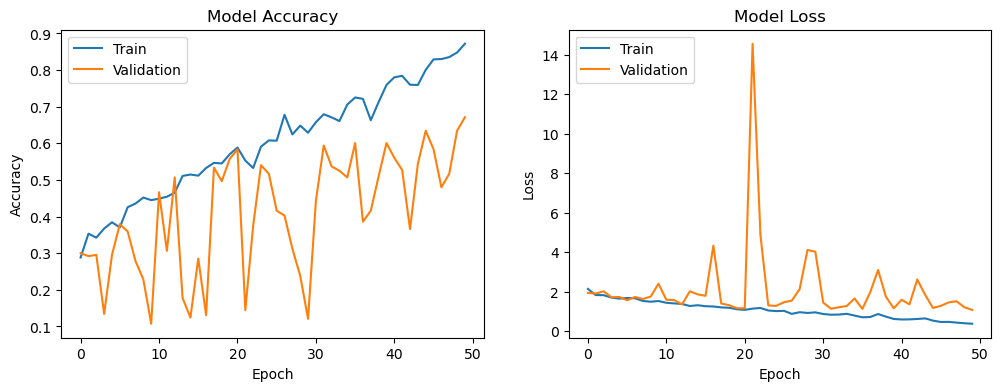

In [8]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

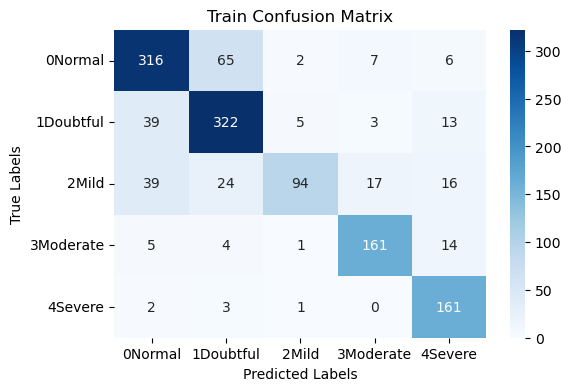

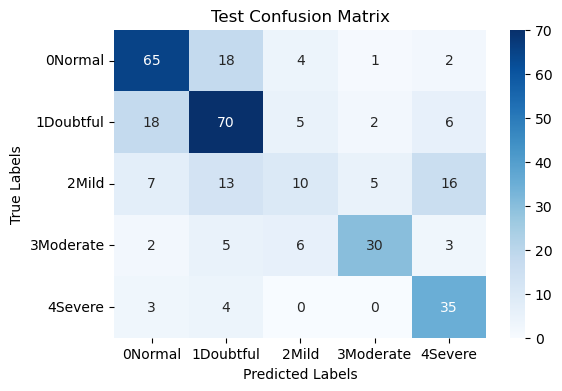

In [9]:
# Get true labels from the validation generator
y_true_test = []
y_pred_test = []

# Make predictions and collect labels
for i in range(len(val_paths) // batch_size + 1):  # Process in batches
    x_batch, y_batch = next(validation_generator)
    y_true_test.extend(np.argmax(y_batch, axis=1))
    y_pred_batch = model.predict_on_batch(x_batch)
    y_pred_test.extend(np.argmax(y_pred_batch, axis=1))

y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

cm_test = confusion_matrix(y_true_test, y_pred_test)
# Get true labels from the validation generator
y_true_train = []
y_pred_train = []

# Make predictions and collect labels
for i in range(len(train_paths) // batch_size + 1):  # Process in batches
    x_batch, y_batch = next(train_generator)
    y_true_train.extend(np.argmax(y_batch, axis=1))
    y_pred_batch = model.predict_on_batch(x_batch)
    y_pred_train.extend(np.argmax(y_pred_batch, axis=1))

y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)

cm_train = confusion_matrix(y_true_train, y_pred_train)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [10]:
classification_report_train = classification_report(y_true_train, y_pred_train, target_names= class_names)
print(classification_report_train)

classification_report_test = classification_report(y_true_test, y_pred_test, target_names= class_names)
print(classification_report_test)


              precision    recall  f1-score   support

     0Normal       0.79      0.80      0.79       396
   1Doubtful       0.77      0.84      0.81       382
       2Mild       0.91      0.49      0.64       190
   3Moderate       0.86      0.87      0.86       185
     4Severe       0.77      0.96      0.85       167

    accuracy                           0.80      1320
   macro avg       0.82      0.79      0.79      1320
weighted avg       0.81      0.80      0.79      1320

              precision    recall  f1-score   support

     0Normal       0.68      0.72      0.70        90
   1Doubtful       0.64      0.69      0.66       101
       2Mild       0.40      0.20      0.26        51
   3Moderate       0.79      0.65      0.71        46
     4Severe       0.56      0.83      0.67        42

    accuracy                           0.64       330
   macro avg       0.61      0.62      0.60       330
weighted avg       0.63      0.64      0.62       330

